In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans

os.chdir('E:\\FCSE\\Introduction To Data science\\assignment 3')
#from sklearn.impute import KNNImputer
#try to imputate the data using knn


In [5]:
pd.set_option('display.max_rows',10)
sales=pd.read_csv('sales.csv')
print(sales.head(10))
print('\nthe dataTypes are:')
print(sales.dtypes)
print("\nDescriptive statistics are: ")
print(sales.describe().to_string())




   Store  Category        Date  Weekly_Sales  Holiday
0      1         1  2010-02-05      24924.50    False
1      1         1  2010-02-12      46039.49     True
2      1         1  2010-02-19      41595.55    False
3      1         1  2010-02-26      19403.54    False
4      1         1  2010-03-05      21827.90    False
5      1         1  2010-03-12      21043.39    False
6      1         1  2010-03-19      22136.64    False
7      1         1  2010-03-26      26229.21    False
8      1         1  2010-04-02      57258.43    False
9      1         1  2010-04-09      42960.91    False

the dataTypes are:
Store             int64
Category          int64
Date             object
Weekly_Sales    float64
Holiday            bool
dtype: object

Descriptive statistics are: 
               Store       Category   Weekly_Sales
count  421570.000000  421570.000000  421570.000000
mean       22.200546      44.260317   15981.258123
std        12.785297      30.492054   22711.183519
min         1.0000

In [6]:
fuel=pd.read_csv('fuel.csv')
print(fuel.head(10))
print('\nthe dataTypes are:')
print(fuel.dtypes)
print(fuel.describe().to_string())
#there is nothing suspicious about the fuel prices 


   Store        Date  Fuel_Price
0      1  2010-02-05       2.572
1      1  2010-02-12       2.548
2      1  2010-02-19       2.514
3      1  2010-02-26       2.561
4      1  2010-03-05       2.625
5      1  2010-03-12       2.667
6      1  2010-03-19       2.720
7      1  2010-03-26       2.732
8      1  2010-04-02       2.719
9      1  2010-04-09       2.770

the dataTypes are:
Store           int64
Date           object
Fuel_Price    float64
dtype: object
             Store   Fuel_Price
count  8190.000000  8190.000000
mean     23.000000     3.405992
std      12.987966     0.431337
min       1.000000     2.472000
25%      12.000000     3.041000
50%      23.000000     3.513000
75%      34.000000     3.743000
max      45.000000     4.468000


In [8]:
weather=pd.read_csv('weather.csv')
print(weather.head(10))
print('\nthe dataTypes are:')
print(weather.dtypes)
print(weather.describe().to_string())
#the temperatures are recorded in fahrenheit the mean temperature make sense to me
#there is nothing suspicious about the temperature data



   Store        Date  Temperature
0      1  2010-02-05        42.31
1      1  2010-02-12        38.51
2      1  2010-02-19        39.93
3      1  2010-02-26        46.63
4      1  2010-03-05        46.50
5      1  2010-03-12        57.79
6      1  2010-03-19        54.58
7      1  2010-03-26        51.45
8      1  2010-04-02        62.27
9      1  2010-04-09        65.86

the dataTypes are:
Store            int64
Date            object
Temperature    float64
dtype: object
             Store  Temperature
count  8190.000000  8190.000000
mean     23.000000    59.356198
std      12.987966    18.678607
min       1.000000    -7.290000
25%      12.000000    45.902500
50%      23.000000    60.710000
75%      34.000000    73.880000
max      45.000000   101.950000


In [ ]:
sales.fillna(0,inplace=True)
boolmask=sales['Weekly_Sales']<=0
sales[boolmask]
sales.drop(sales[boolmask].index,inplace=True)
sales

,Store,Category,Date,Weekly_Sales,Holiday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [ ]:
mergedDF=pd.merge(pd.merge(sales,weather,on=['Date','Store']),fuel,on=['Date','Store'])
mergedDF


,Store,Category,Date,Weekly_Sales,Holiday,Temperature,Fuel_Price
0,1,1,2010-02-05,24924.50,False,42.31,2.572
1,1,2,2010-02-05,50605.27,False,42.31,2.572
2,1,3,2010-02-05,13740.12,False,42.31,2.572
3,1,4,2010-02-05,39954.04,False,42.31,2.572
4,1,5,2010-02-05,32229.38,False,42.31,2.572
...,...,...,...,...,...,...,...
420207,45,93,2012-10-26,2487.80,False,58.85,3.882
420208,45,94,2012-10-26,5203.31,False,58.85,3.882
420209,45,95,2012-10-26,56017.47,False,58.85,3.882
420210,45,97,2012-10-26,6817.48,False,58.85,3.882


(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(-20.0, 0, '2012-06-15'),
  Text(0.0, 0, '2010-02-05'),
  Text(20.0, 0, '2010-06-25'),
  Text(40.0, 0, '2010-11-12'),
  Text(60.0, 0, '2011-04-01'),
  Text(80.0, 0, '2011-08-19'),
  Text(100.0, 0, '2012-01-06'),
  Text(120.0, 0, '2012-05-25'),
  Text(140.0, 0, '2012-10-12'),
  Text(160.0, 0, '')])

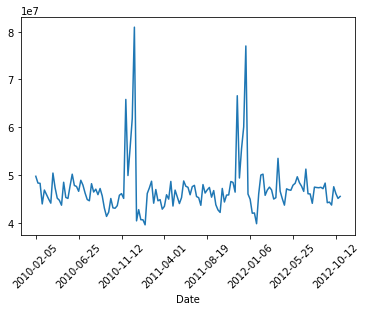

In [ ]:
weeklysales=mergedDF.groupby('Date')['Weekly_Sales'].sum()
weeklysales.plot.line(x='Date',y='Weekly_Sales')
plt.xticks(rotation=45)
#the sales are increasing at the end of the year


Category
1     1.236388e+08
2     2.806112e+08
3     7.589245e+07
4     1.671467e+08
5     1.356074e+08
          ...     
95    4.493202e+08
96    7.383421e+07
97    8.949653e+07
98    3.982907e+07
99    3.584093e+05
Name: Weekly_Sales, Length: 81, dtype: float64

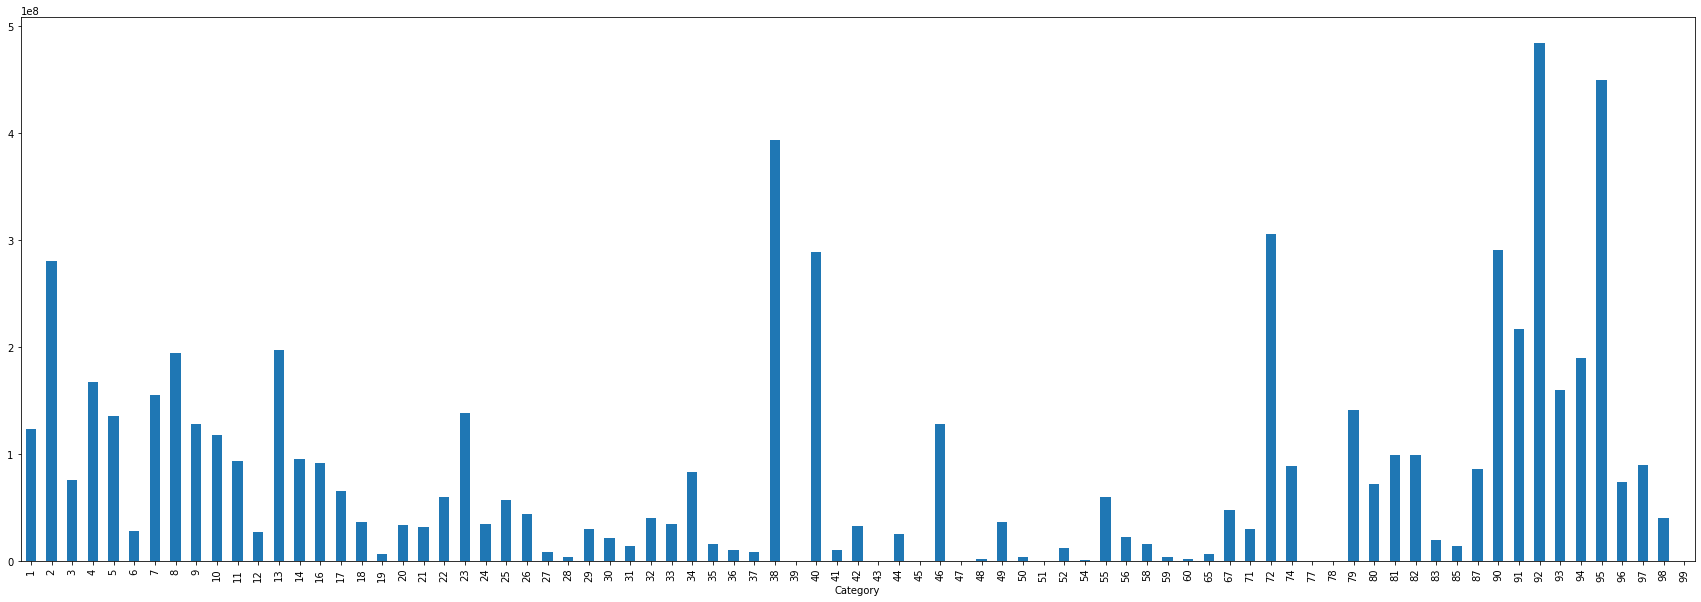

In [ ]:
plt.subplots(figsize=(30,10))
brandTotal=mergedDF.groupby('Category')['Weekly_Sales'].sum()
brandTotal.plot.bar()
brandTotal
#product 92 is the most selling product

In [ ]:
storeSales=mergedDF.groupby("Store")['Weekly_Sales'].sum()
sortedDF=storeSales.sort_values(ascending=False)
top10=sortedDF.iloc[:10]
top10


Store
20    3.014014e+08
4     2.995453e+08
14    2.890019e+08
13    2.865180e+08
2     2.753872e+08
10    2.716241e+08
27    2.538572e+08
6     2.237586e+08
1     2.224068e+08
39    2.074465e+08
Name: Weekly_Sales, dtype: float64

<AxesSubplot:xlabel='Store'>

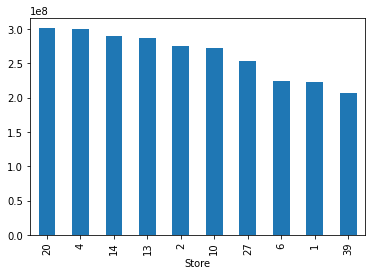

In [ ]:
top10.plot.bar(x=top10.index)
#top10.plot.hist(y=top10.index)
#the difference between the sales of the store 20 and store 39 are considerably high


<AxesSubplot:xlabel='Holiday'>

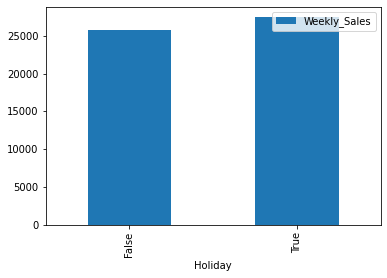

In [ ]:
arrayOfIndices=np.array(top10.index) 
top10MergedDf=mergedDF[mergedDF["Store"].isin (arrayOfIndices)]
SalesInHoliDays=pd.DataFrame(top10MergedDf.groupby(["Holiday"])["Weekly_Sales"].mean())
SalesInHoliDays.plot.bar()



Holiday,False,True
Store,,
1,21650.982870,23039.386667
2,26816.330261,28879.050000
4,29047.614577,30854.231417
6,21853.142774,23378.756982
10,26259.151499,29317.702136
13,27308.861113,28593.285602
14,28789.081322,30164.765263
20,29498.635706,31325.600070
27,24787.311478,26355.225320


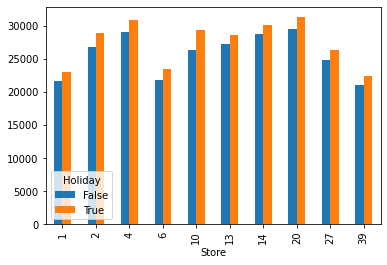

In [ ]:
#question 5
SalesOfStoresInHoliDays=pd.DataFrame(top10MergedDf.groupby(["Holiday","Store"])["Weekly_Sales"].mean())
SalesOfStoresInHoliDays=SalesOfStoresInHoliDays.pivot_table("Weekly_Sales","Store","Holiday")
SalesOfStoresInHoliDays.plot.bar()
plt.legend(title="Holiday",loc='lower left')
SalesOfStoresInHoliDays
#in holidays the sales are increasing


<AxesSubplot:xlabel='Category'>

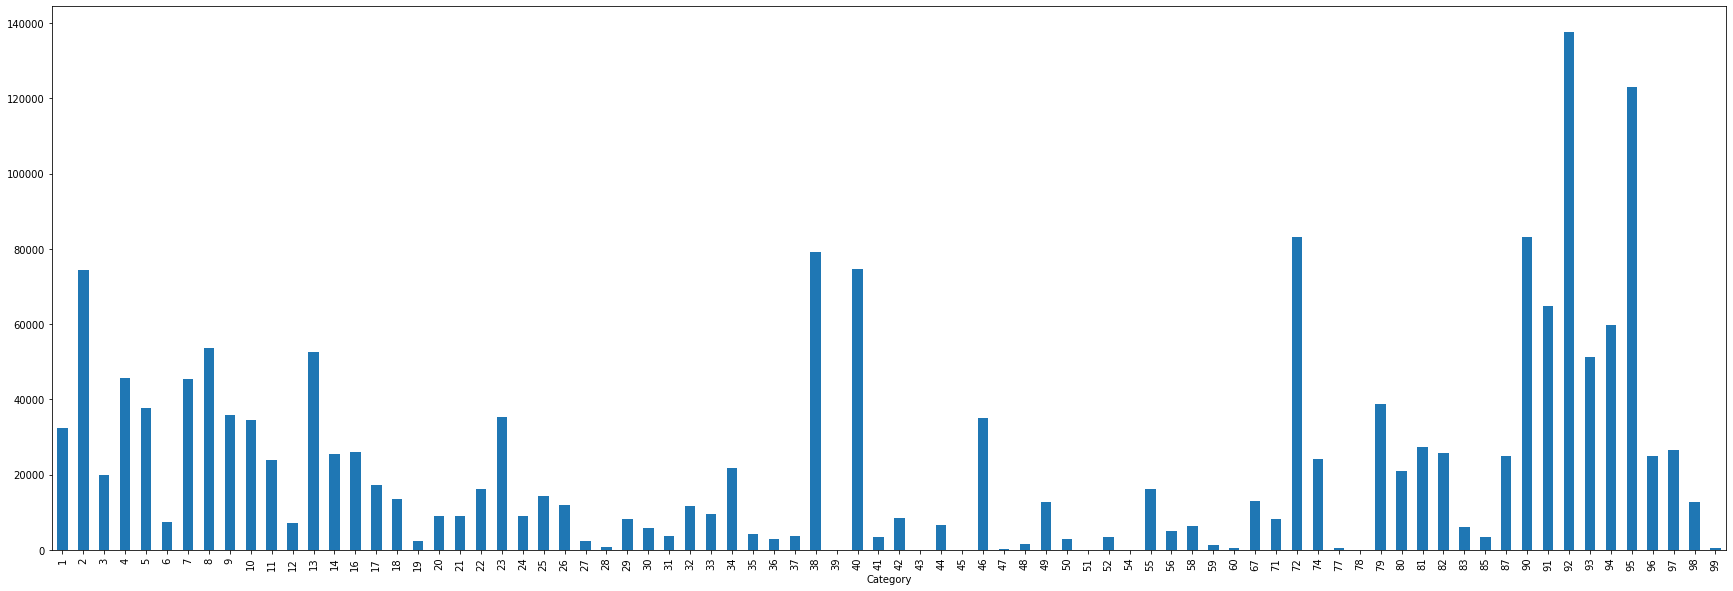

In [ ]:
#question 6 not sure about it
plt.subplots(figsize=(30,10))
top10MergedDf.groupby(['Category'])["Weekly_Sales"].mean().plot.bar()
##############over lay the two graphs##########


,Store,Category,Date,Weekly_Sales,Holiday,Temperature,Fuel_Price
0,1,1,2010-02-05,24924.50,False,42,2.572
1,1,2,2010-02-05,50605.27,False,42,2.572
2,1,3,2010-02-05,13740.12,False,42,2.572
3,1,4,2010-02-05,39954.04,False,42,2.572
4,1,5,2010-02-05,32229.38,False,42,2.572
...,...,...,...,...,...,...,...
420207,45,93,2012-10-26,2487.80,False,58,3.882
420208,45,94,2012-10-26,5203.31,False,58,3.882
420209,45,95,2012-10-26,56017.47,False,58,3.882
420210,45,97,2012-10-26,6817.48,False,58,3.882


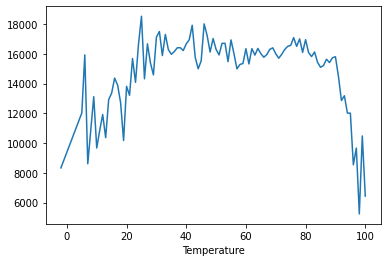

In [ ]:
#changing the valus in temperature with integers to the line plot is not jagged
tempMerged=mergedDF
tempMerged["Temperature"]=mergedDF['Temperature'].astype('int64')
TempandSales=tempMerged.groupby("Temperature")['Weekly_Sales'].mean().plot(kind="line")
#the sales are decreasing at extreme points
#the sales are decreasing more in the very hot days
mergedDF


In [ ]:
tempMerged['Fuel_Price']=mergedDF['Fuel_Price'].round(decimals = 1)
mergedDF

,Store,Category,Date,Weekly_Sales,Holiday,Temperature,Fuel_Price
0,1,1,2010-02-05,24924.50,False,42,2.6
1,1,2,2010-02-05,50605.27,False,42,2.6
2,1,3,2010-02-05,13740.12,False,42,2.6
3,1,4,2010-02-05,39954.04,False,42,2.6
4,1,5,2010-02-05,32229.38,False,42,2.6
...,...,...,...,...,...,...,...
420207,45,93,2012-10-26,2487.80,False,58,3.9
420208,45,94,2012-10-26,5203.31,False,58,3.9
420209,45,95,2012-10-26,56017.47,False,58,3.9
420210,45,97,2012-10-26,6817.48,False,58,3.9


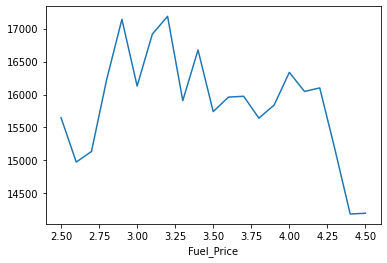

In [ ]:
TempandSales=mergedDF.groupby("Fuel_Price")['Weekly_Sales'].mean().plot(kind="line")

In [ ]:
newMerged=mergedDF[["Temperature","Weekly_Sales","Fuel_Price","Holiday","Category"]]
##########remember to remove the comment from the line below#####################
#sns.pairplot(newMerged,hue="Holiday")
#the top  sales are happining during the weekends



Store             int32
Category          int32
Date             object
Weekly_Sales    float64
Holiday            bool
Temperature       int64
Fuel_Price      float64
dtype: object

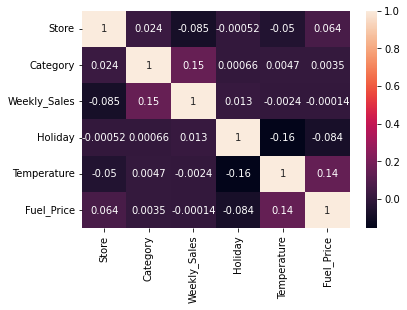

In [ ]:
mergedDF['Store']=mergedDF['Store'].astype('int')
mergedDF['Category']=mergedDF['Category'].astype('int')
matrix=mergedDF.corr()
sns.heatmap(matrix,annot=True)

mergedDF.dtypes
#there is small inverse correlation between the fuel prices the weekly sales

In [ ]:
#we will only use the attributes below for training because these are the attributes
#that yields the best results
#Q1 and Q2 in modeling
mergedDF['Date']=pd.to_datetime(mergedDF['Date'])
mergedDF['Date']=mergedDF['Date'].dt.strftime('%m')

mergedDF['Date']=mergedDF['Date'].astype('int64')
x=mergedDF[["Store",'Category','Holiday',"Fuel_Price"]]
y=mergedDF[['Weekly_Sales']]
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2)


In [ ]:
#question 3.0
model =KNeighborsRegressor(n_neighbors =12)

model.fit(x_train, y_train)  #fit the model
#pred=model.predict(x_test) #make prediction on test set
model1Score=model.score(x_test,y_test)
model1Score
#mergedDF



0.9071938403832405

,Category,Weekly_Sales,Clusters
0,1,19213.485088,2
1,2,43607.020113,1
2,3,11793.698516,0
3,4,25974.630238,2
4,5,21368.950301,2
...,...,...,...
76,95,69824.423080,1
77,96,15280.257659,2
78,97,14262.394977,2
79,98,6858.802958,0


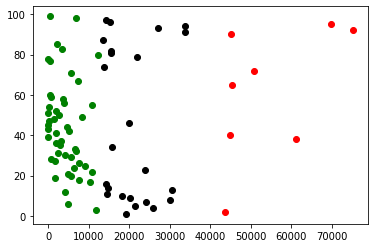

In [ ]:
#question 5 wrong answer
#plt.subplots(figsize=(30,10))
category=pd.DataFrame(mergedDF.groupby("Category")['Weekly_Sales'].mean())
km=KMeans(n_clusters=3)
category.reset_index(inplace=True)
y_predicted=km.fit_predict(category[['Weekly_Sales']])
category['Clusters']=km.labels_
#mergedDF
category
DF1=category[category['Clusters']==0]
DF2=category[category['Clusters']==1]
DF3=category[category['Clusters']==2]
plt.scatter(DF1['Weekly_Sales'],DF1['Category'],color='green')
plt.scatter(DF2['Weekly_Sales'],DF2['Category'],color='red')
plt.scatter(DF3['Weekly_Sales'],DF3['Category'],color='black')
category
